In [1]:
import numpy as np

In [2]:
B1  = 1.306499562505651; # 1/nM : Technicaly 1/B1
B1U = 0.628011;
B2  = 13.188605503222075; # 1/nM^2 : Technicaly 1/B2
B2U = 7.33096;
r1  = 0.072953;
r1U = 0.00842918;
r2  = 0.121328;
r2U = 0.00285027;

Protein = np.array([0, 2.990486328, 4.433071913, 5.77689243, 7.309631202, 
   8.648111332, 10.36536934, 11.88838931, 17.75977874, 24.518128549, 
   48.22119103, 71.14872575, 93.50754646, 114.9889516]);
UProtein = np.array([0, 0.067030478, 0.067448616, 0.067845367, 0.068306212, 
   0.068715724, 0.069250526, 0.069733439, 0.07166675, 0.07402117, 
   0.105201457, 0.126848252, 0.148106869, 0.168585158]);
Anisotropy10 = np.array([0, 0.028224324, 0.02890357, 0.036851922, 0.048777304, 
   0.039710592, 0.05816555, 0.055951425, 0.075796326, 0.089965191, 
   0.104286034, 0.112507896, 0.115502122, 0.115059991]);
Anisotropy25 = np.array([0, 0.035135781, 0.054706702, 0.064648821, 0.073797816,
    0.068000762, 0.087084019, 0.091287392, 0.092446542, 0.100146355, 
   0.107722725, 0.11358153, 0.117416064, 0.113661474]);
UAnisotropy = np.array([0.006346024, 0.006346024, 0.006346024, 0.006346024, 
   0.006346024, 0.006346024, 0.006346024, 0.006346024, 0.006346024, 
   0.006346024, 0.006346024, 0.006346024, 0.006346024, 0.006346024]);

kfactor = 2.0;
kratio = B1*B1/B2;
k1A = B1 / 2.0;

In [3]:
print("Ka1 : {}".format(2/B1))
print("Ka2 : {}".format(B1/(2*B2)))
print("Ka1 : {}".format(1.0/(2/B1)))
print("Ka2 : {}".format(1.0/(B1/(2*B2))))

Ka1 : 1.53080801356
Ka2 : 0.0495313762394
Ka1 : 0.653249781253
Ka2 : 20.1892229921


In [4]:
from numpy.lib.scimath import sqrt
from numpy import conj

# param["k2A"] = 4.0*param["k1A"]/param["kratio"]

def States(NCP, Protein, B1, B2):
    param = {
        'r1' :  r1,
        'r2'  : r2,
        'k1A'  : 1.0 / (2.0*B1),
        'kratio' : B2/(B1*B1),
        'kfactor'  : 2.0,
        'Substrate' : NCP,
        'x' : Protein
        }

    P = -((param['kratio']*(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio']))/(12.0*param['k1A']**2.0))-(param['kratio']*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0))/(6.0*2.0**(2.0/3.0)*param['k1A']**2.0*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+(1.0/(12.0*2.0**(1.0/3.0)*param['k1A']**2.0))*param['kratio']*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0)
    N = 1.0/(-param['k1A']*param['kfactor']**2.0+(16.0*param['k1A'])/param['kratio'])*(-param["Substrate"]*param['k1A']*param['kfactor']**2.0+(16.0*param["Substrate"]*param['k1A'])/param['kratio']+param['k1A']*param['kfactor']**2.0*param["x"]-(8.0*param['k1A']*param["x"])/param['kratio']-param['k1A']*param['kfactor']**2.0*(-((param['kratio']*(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio']))/(12.0*param['k1A']**2.0))-(param['kratio']*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0))/(6.0*2.0**(2.0/3.0)*param['k1A']**2.0*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/(12.0*2.0**(1.0/3.0)*param['k1A']**2.0)*param['kratio']*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/param['kratio']*8.0*param['k1A']*(-((param['kratio']*(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio']))/(12.0*param['k1A']**2.0))-(param['kratio']*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0))/(6.0*2.0**(2.0/3.0)*param['k1A']**2.0*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/(12.0*2.0**(1.0/3.0)*param['k1A']**2.0)*param['kratio']*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))-1.0/param['kratio']*8.0*param["Substrate"]*param['k1A']**2.0*param['kfactor']*(-((param['kratio']*(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio']))/(12.0*param['k1A']**2.0))-(param['kratio']*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0))/(6.0*2.0**(2.0/3.0)*param['k1A']**2.0*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/(12.0*2.0**(1.0/3.0)*param['k1A']**2.0)*param['kratio']*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/param['kratio']*4.0*param['k1A']**2.0*param['kfactor']*param["x"]*(-((param['kratio']*(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio']))/(12.0*param['k1A']**2.0))-(param['kratio']*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0))/(6.0*2.0**(2.0/3.0)*param['k1A']**2.0*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/(12.0*2.0**(1.0/3.0)*param['k1A']**2.0)*param['kratio']*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))-1.0/param['kratio']*4.0*param['k1A']**2.0*param['kfactor']*(-((param['kratio']*(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio']))/(12.0*param['k1A']**2.0))-(param['kratio']*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0))/(6.0*2.0**(2.0/3.0)*param['k1A']**2.0*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))+1.0/(12.0*2.0**(1.0/3.0)*param['k1A']**2.0)*param['kratio']*(-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0+sqrt((-2.0*param['k1A']**3.0*param['kfactor']**3.0-(1024.0*param["Substrate"]**3.0*param['k1A']**6.0)/param['kratio']**3.0+(288.0*param["Substrate"]*param['k1A']**4.0)/param['kratio']**2.0-(96.0*param["Substrate"]**2.0*param['k1A']**5.0*param['kfactor'])/param['kratio']**2.0+(36.0*param['k1A']**3.0*param['kfactor'])/param['kratio']-(12.0*param["Substrate"]*param['k1A']**4.0*param['kfactor']**2.0)/param['kratio']+(1536.0*param["Substrate"]**2.0*param['k1A']**6.0*param["x"])/param['kratio']**3.0+(288.0*param['k1A']**4.0*param["x"])/param['kratio']**2.0-(48.0*param["Substrate"]*param['k1A']**5.0*param['kfactor']*param["x"])/param['kratio']**2.0-(12.0*param['k1A']**4.0*param['kfactor']**2.0*param["x"])/param['kratio']-(768.0*param["Substrate"]*param['k1A']**6.0*param["x"]**2.0)/param['kratio']**3.0+(48.0*param['k1A']**5.0*param['kfactor']*param["x"]**2.0)/param['kratio']**2.0+(128.0*param['k1A']**6.0*param["x"]**3.0)/param['kratio']**3.0)**2.0+4.0*((12.0*param['k1A']**2.0*(1.0+param["Substrate"]*param['k1A']*param['kfactor']-param['k1A']*param['kfactor']*param["x"]))/param['kratio']-(param['k1A']*param['kfactor']+(8.0*param["Substrate"]*param['k1A']**2.0)/param['kratio']-(4.0*param['k1A']**2.0*param["x"])/param['kratio'])**2.0)**3.0))**(1.0/3.0))**2.0)
    P = np.abs(P)
    N = np.abs(N)
    PN = P * N / B1
    PPN = P * P * N / B2
    return (P,N,PN,PPN)

def PlotSim(NCP, Protein, B1, B2, r1, r2):
    P, N, PN, PPN = States(NCP, Protein, B1, B2)
    return (r1*PN + r2*PPN)/NCP



In [5]:
T = States(10.0, 20.0, B1, B2)
print(T[0] + T[2]+T[3]*2)
print(T[1] + T[2]+T[3])
print(T)
[PlotSim(10.0, CP, B1, B2, r1, r2) for CP in Protein]

20.0
10.0
(7.1956500556267997, 0.95845141124811317, 5.2787472331306189, 3.7628013556213342)


[2.5288366554212859e-16,
 0.018558404829708247,
 0.026898982251099011,
 0.034247013299448181,
 0.042084285452803981,
 0.048424814318856903,
 0.055850445533995222,
 0.06177147370476116,
 0.079310354514356196,
 0.091710800661878977,
 0.10827686291430812,
 0.11311813060472012,
 0.11533162909010419,
 0.11657269608856154]

In [6]:
1/0.382702003390

2.612999125016156

In [7]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np

In [8]:
%matplotlib --list

# import matplotlib
# import matplotlib.pyplot as mpl
# import matplotlib.ticker
# import matplotlib.cm as cm

import MPLGUI as MP
%matplotlib inline

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']


In [9]:
# Function Based Example

# Import Binding Funtions
from Helpers.OneToOne import *

N = 1e2
XLim = [0.0, 120.0]
YLim = [0.0, 0.125]

XAxisPoints = np.linspace(XLim[0],XLim[1], N)

# Generate Plot Data
NCP25  = np.array([PlotSim(2.5, CP, B1, B2, r1, r2) for CP in XAxisPoints])
NCP25H = np.array([PlotSim(2.5, CP, B1-B1U, B2-B2U, r1+r1U, r2+r2U) for CP in XAxisPoints])
NCP25L = np.array([PlotSim(2.5, CP, B1+B1U, B2+B2U, r1-r1U, r2-r2U) for CP in XAxisPoints])
NCP10  = np.array([PlotSim(10.0, CP, B1, B2, r1, r2) for CP in XAxisPoints])
NCP10H = np.array([PlotSim(10.0, CP, B1-B1U, B2-B2U, r1+r1U, r2+r2U) for CP in XAxisPoints])
NCP10L = np.array([PlotSim(10.0, CP, B1+B1U, B2+B2U, r1-r1U, r2-r2U) for CP in XAxisPoints])

In [10]:
# Figure Settings
ImgFileName = 'Line_r_vs_ISWI.pdf'
XAxisLabel  = r'[ISWI]$_0$ (nM)'
YAxisLabel  = r'Change in Anisotropy ($\Delta r$)'

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


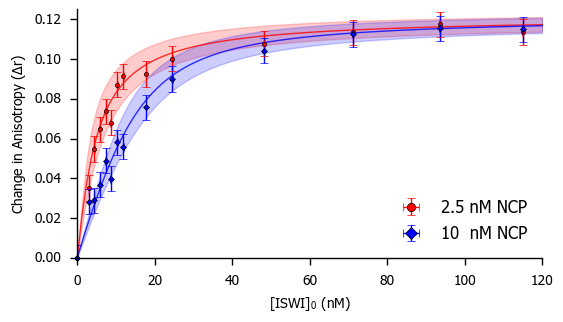

In [11]:
MainPlot = MP.LinePlot(
    Width="wide",
    YAxisInPercent = False,
    subplot = 211,
    )

MainPlot.AddLine(
    XAxisPoints,
    NCP25[XBounds],
#     label="2.5 nM NCP",
    color="red",
    clip_on=False,
    alpha=0.8,
    zorder=1,
    xlog = False,
    )
MainPlot._Plot.fill_between(
    XAxisPoints,
    NCP25L[XBounds],
    NCP25H[XBounds],
    color="red",
    alpha=0.2,
#     edgecolor='#1B2ACC',
#     facecolor='#089FFF',
    linewidth=1,
#     linestyle='dashdot',
    antialiased=True,
)

MainPlot.AddLine(
    XAxisPoints,
    NCP10[XBounds],
#     label="10 nM NCP",
    color="Blue",
    clip_on=False,
    alpha=0.8,
    zorder=1,
    xlog = False,
    )

MainPlot._Plot.fill_between(
    XAxisPoints,
    NCP10L[XBounds],
    NCP10H[XBounds],
    color="blue",
    alpha=0.2,
#     edgecolor='#1B2ACC',
#     facecolor='#089FFF',
    linewidth=1,
#     linestyle='dashdot',
    antialiased=True,
)

MainPlot._Plot.errorbar(
    Protein,
    Anisotropy25,
    xerr = UProtein,
    yerr = UAnisotropy,
    marker='o',
    linestyle = "none",
    markersize = 3.0,
    label="2.5 nM NCP",
    color="red",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    )

MainPlot._Plot.errorbar(
    Protein,
    Anisotropy10,
    marker='D',
    xerr = UProtein,
    yerr = UAnisotropy,
    markersize = 3.0,
    linestyle = "none",
    label="10  nM NCP",
    color="Blue",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
#     loc = "best",
    loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5,
    numpoints=1,
    markerscale = 2.0,
    )

MainPlot.SetXRange(XLim[0],XLim[1])
MainPlot.SetYRange(YLim[0],YLim[1])


MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )
MP1 = MainPlot

In [12]:
# Function Based Example

# Import Binding Funtions
from Helpers.OneToOne import *

N = 1e3
XLim = [0.0, 120.0]
YLim = [0.0, 1.0]

XAxisPoints = np.linspace(XLim[0],XLim[1], N)

# Generate Plot Data
N  = np.array([States(10.0, CP, B1, B2)[1] for CP in XAxisPoints])/10.0
NH = np.array([States(10.0, CP, B1-B1U, B2-B2U)[1] for CP in XAxisPoints])/10.0
NL = np.array([States(10.0, CP, B1+B1U, B2+B2U)[1] for CP in XAxisPoints])/10.0
PN  = np.array([States(10.0, CP, B1, B2)[2] for CP in XAxisPoints])/10.0
PNH = np.array([States(10.0, CP, B1-B1U, B2-B2U)[2] for CP in XAxisPoints])/10.0
PNL = np.array([States(10.0, CP, B1+B1U, B2+B2U)[2] for CP in XAxisPoints])/10.0
PPN = np.array([States(10.0, CP, B1, B2)[3] for CP in XAxisPoints])/10.0
PPNH= np.array([States(10.0, CP, B1-B1U, B2-B2U)[3] for CP in XAxisPoints])/10.0
PPNL= np.array([States(10.0, CP, B1+B1U, B2+B2U)[3] for CP in XAxisPoints])/10.0

In [13]:
# Figure Settings
ImgFileName = 'Line_SpeciesFraction_vs_ISWI.pdf'
XAxisLabel  = r'[ISWI]$_0$ (nM)'
YAxisLabel  = r'Species Yield'

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

In [14]:
MainPlot = MP.LinePlot(
    Width="wide",
    YAxisInPercent = False,
    subplot = 212,
    PrimaryFig = MP1._MainFig,
    )

MainPlot.AddLine(
    XAxisPoints,
    N[XBounds],
#     label="2.5 nM NCP",
    color="red",
    clip_on=False,
    alpha=0.8,
    zorder=1,
    xlog = False,
    label = 'N',
    linewidth = 0.8,
    )

MainPlot._Plot.fill_between(
    XAxisPoints,
    NL[XBounds],
    NH[XBounds],
    color="red",
    alpha=0.2,
#     edgecolor='#1B2ACC',
#     facecolor='#089FFF',
    linewidth=1,
#     linestyle='dashdot',
    antialiased=True,
)

MainPlot.AddLine(
    XAxisPoints,
    PN[XBounds],
#     label="10 nM NCP",
    color="Blue",
    clip_on=False,
    alpha=0.8,
    zorder=1,
    xlog = False,
    label = 'PN',
    linewidth = 0.8,
    )

MainPlot._Plot.fill_between(
    XAxisPoints,
    PNL[XBounds],
    PNH[XBounds],
    color="blue",
    alpha=0.2,
#     edgecolor='#1B2ACC',
#     facecolor='#089FFF',
    linewidth=1,
#     linestyle='dashdot',
    antialiased=True,
)

MainPlot.AddLine(
    XAxisPoints,
    PPN[XBounds],
#     label="10 nM NCP",
    color="darkorange",
    clip_on=False,
    alpha=0.8,
    zorder=0,
    xlog = False,
    label = 'PPN',
    linewidth = 0.8,
    )

MainPlot._Plot.fill_between(
    XAxisPoints,
    PPNL[XBounds],
    PPNH[XBounds],
    color="darkorange",
    alpha=0.2,
#     edgecolor='#1B2ACC',
#     facecolor='#089FFF',
    linewidth=1,
#     linestyle='dashdot',
    antialiased=True,
)

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5,
    numpoints=1,
    markerscale = 2.0,
    )

MainPlot.SetXRange(XLim[0],XLim[1])
MainPlot.SetYRange(YLim[0],YLim[1])


MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )